In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import folium
import requests
import urllib.request
#!conda install python3-bs4 --yes
!conda install beautifulsoup4 --yes
!conda install lxml --yes
from bs4 import BeautifulSoup
!conda install -c conda-forge geopy --yes
from geopy import geocoders
from geopy.geocoders import Nominatim
print("libraries imported")

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - beautifulsoup4


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2020.4.5~ --> pkgs/main::ca-certificates-2020.1.1-0
  certifi            conda-forge::certifi-2020.4.5.1-py36h~ --> pkgs/main::certifi-2020.4.5.1-py36_0
  openssl            conda-forge::openssl-1.1.1g-h516909a_0 --> pkgs/main::openssl-1.1.1g-h7b6447c_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

# All requested packages already installed.

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be UPDATED:

  ca-certificates     pkgs/main::ca-certificates-2020.1.1-0 --> conda-forge::ca-certificates-2020.4.5.1-hecc5488_0

The fol

In [2]:
wiki='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
df=pd.read_html(wiki, header=0)[0]

df.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


#Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.

In [3]:
uns_borough = df[df['Borough']!="Not assigned"]
uns_borough.head()

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


#count the number of unique postal codes

In [4]:
print(len(df['Postal Code'].unique()))

180


Here we can see that all the postal codes are unique, so the corresponding neighborhoods are assigned to them

In [5]:
#check for neighborhood if not assigned value is there
for notAssign in uns_borough['Neighborhood']:
    if notAssign == "Not assigned":
        print(uns_borough[notAssign])

As we have checked that no "Not assigned" value is there in neighborhood column just for logic now we will now fill the Not assigned neighborhood with the corresponding borough

In [12]:
for bor, neigh in zip(uns_borough['Borough'],uns_borough['Neighborhood']):
    if neigh=='Not assigned':
        uns_borough[neigh] = uns_borough[bor]
        
uns_borough.tail()        

,Postal Code,Borough,Neighborhood
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,Business reply mail Processing Centre
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


Submission 1: Shape of the DataFrame

In [13]:
print("Shape of the DataFrame is:",uns_borough.shape)

Shape of the DataFrame is: (103, 3)


Let's import the latitudes and longitudes

In [14]:
df_geo = pd.read_csv('https://cocl.us/Geospatial_data')
df_geo.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Get the shape of the excel sheet

In [15]:
df_geo.shape

(103, 3)

Now we will append the values of Latitude and Longitude in First dataframe

In [16]:
df3 = pd.merge(uns_borough,df_geo,on='Postal Code')   
df3

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,Business reply mail Processing Centre,43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


Getting all the rows from the data frame which contains Toronto in their Borough.

In [17]:
loc_data = df3[df3['Borough'].str.contains('Toronto',regex=False)]
loc_data.sort_index()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
31,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


Now we will create tha map

In [18]:
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


Lets create a map, with location points as Neighborhood and Borough

In [19]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat,lon,borough,neighor in zip(loc_data['Latitude'],loc_data['Longitude'],loc_data['Borough'],loc_data['Neighborhood']):
    label = '{}, {}'.format(neighor, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

We can observe that the area near west toronto has more neighborhoods.

Now we will apply K Means clustering

In [20]:
#drop the columns which are not numeric
data = loc_data.drop(columns=['Postal Code','Borough','Neighborhood'])
data.head()


,Latitude,Longitude
2,43.654260,-79.360636
4,43.662301,-79.389494
9,43.657162,-79.378937
15,43.651494,-79.375418
19,43.676357,-79.293031


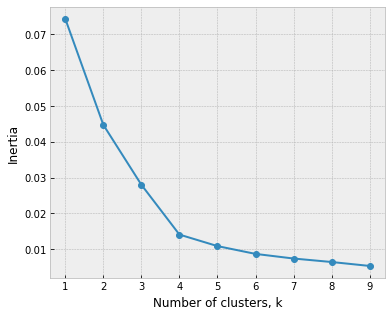

In [21]:
#check the optimal k value
ks = range(1,10)
inertias=[]
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(data)
    inertias.append(model.inertia_)
plt.figure(figsize=(6,5)) 
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

Now we can see that n=4 is giving optimum results. Now we will apply kmeans clustering

In [22]:
k_means = KMeans(n_clusters = 4, random_state=42, n_init=20)
k_means.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=20, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [23]:
k_means.labels_
loc_data.insert(0, 'Cluster Number', k_means.labels_)
loc_data.head()

,Cluster Number,Postal Code,Borough,Neighborhood,Latitude,Longitude
2,2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,2,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,0,M4E,East Toronto,The Beaches,43.676357,-79.293031


In [24]:
loc_data.head()

,Cluster Number,Postal Code,Borough,Neighborhood,Latitude,Longitude
2,2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,2,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,0,M4E,East Toronto,The Beaches,43.676357,-79.293031


Create the folium map with cluster indexes

In [27]:
cluster_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
for cluster,lat,lon,borough,neighbor in zip(loc_data['Cluster Number'],loc_data['Latitude'],
                                           loc_data['Longitude'],loc_data['Borough'],loc_data['Neighborhood']):
    label='Cluster Number:{} {} {}'.format(cluster,borough,neighbor)
    labels=folium.Popup(label,parse_html=True)
    folium.CircleMarker(
    [lat,lon],
    radius=5,
    popup=labels,
    parse_html=False,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    ).add_to(cluster_toronto)
    
cluster_toronto    